In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
import joblib
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,precision_score
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
data = pd.read_csv('corr_data2.csv',encoding='utf-8')
data1= pd.read_csv('data_oversampling.csv',encoding='utf-8')
data['seg_dep_time_gap']=data1['seg_dep_time_gap']

In [64]:
data

,seg_cabin,pax_fcny,seg_route_to,gender,age,city_name,province_name,marital_stat,next_flt_day,pit_out_amt,...,pit_des_mall_cnt_y1,pit_des_out_cnt_y1,pit_avg_amt_y1,pit_avg_interval_y1,pit_ech_avg_amt_y1,pit_out_avg_amt_y1,prebuy_d_cnt_y1_d3,prebuy_i_cnt_y1_d3,emd_lable2,seg_dep_time_gap
0,0.145418,0.011063,0.943262,0.0,0.0,0.0,0.0,0.0,0.007813,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.474834
1,0.145418,0.004440,0.943262,0.0,0.0,0.0,0.0,0.0,0.007813,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.430079
2,1.000000,0.000646,1.000000,0.0,0.0,0.0,0.0,0.0,0.007813,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.672230
3,1.000000,0.003621,1.000000,0.0,0.0,0.0,0.0,0.0,0.007813,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.718384
4,1.000000,0.000665,1.000000,0.0,0.0,0.0,0.0,0.0,0.007813,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.406497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44077,1.000000,0.004188,0.000000,0.0,0.0,0.0,0.0,0.0,0.007813,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.704893
44078,1.000000,0.001662,0.000000,0.0,0.0,0.0,0.0,0.0,0.007813,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.820977
44079,1.000000,0.001587,0.000000,0.0,0.0,0.0,0.0,0.0,0.007813,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.730068
44080,1.000000,0.001587,0.000000,0.0,0.0,0.0,0.0,0.0,0.007813,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.730068


In [65]:
y = data.emd_lable2
x = data.drop('emd_lable2',axis=1)
x

,seg_cabin,pax_fcny,seg_route_to,gender,age,city_name,province_name,marital_stat,next_flt_day,pit_out_amt,...,pit_add_non_cnt_y1,pit_des_mall_cnt_y1,pit_des_out_cnt_y1,pit_avg_amt_y1,pit_avg_interval_y1,pit_ech_avg_amt_y1,pit_out_avg_amt_y1,prebuy_d_cnt_y1_d3,prebuy_i_cnt_y1_d3,seg_dep_time_gap
0,0.145418,0.011063,0.943262,0.0,0.0,0.0,0.0,0.0,0.007813,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.474834
1,0.145418,0.004440,0.943262,0.0,0.0,0.0,0.0,0.0,0.007813,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.430079
2,1.000000,0.000646,1.000000,0.0,0.0,0.0,0.0,0.0,0.007813,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.672230
3,1.000000,0.003621,1.000000,0.0,0.0,0.0,0.0,0.0,0.007813,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.718384
4,1.000000,0.000665,1.000000,0.0,0.0,0.0,0.0,0.0,0.007813,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.406497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44077,1.000000,0.004188,0.000000,0.0,0.0,0.0,0.0,0.0,0.007813,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.704893
44078,1.000000,0.001662,0.000000,0.0,0.0,0.0,0.0,0.0,0.007813,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.820977
44079,1.000000,0.001587,0.000000,0.0,0.0,0.0,0.0,0.0,0.007813,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.730068
44080,1.000000,0.001587,0.000000,0.0,0.0,0.0,0.0,0.0,0.007813,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.730068


# 模型测试

In [66]:
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.3,random_state=0,stratify=y)

In [67]:
model =  RandomForestClassifier()
model.fit(train_x,train_y)
y_pred = model.predict(test_x) # 对新的样本Z做预测 
accuracy_score(test_y, y_pred)

0.9893383742911153

[[6443  144]
 [   0 6638]]


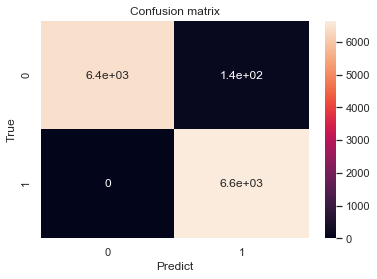

In [61]:
sns.set()
f,ax=plt.subplots()
C2= confusion_matrix(test_y, y_pred, labels=[0, 1])
print(C2) #打印出来看看
sns.heatmap(C2,annot=True,ax=ax) #画热力图
ax.set_title('Confusion matrix') #标题
ax.set_xlabel('Predict') #x轴
ax.set_ylabel('True') #y轴
plt.savefig('matrix.png',dpi=300)

In [68]:
# #feature_importances_  # #可以调取关于特征重要程度
imp_fea=[]
feat_labels = x.columns[:]
importances = model.feature_importances_
x_columns = data.columns[:]
indices = np.argsort(importances)[::-1]
for f in range(train_x.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))
    imp_fea.append(feat_labels[indices[f]])

 1) seg_dep_time_gap               0.239577
 2) pax_fcny                       0.227000
 3) seg_cabin                      0.045206
 4) seg_dep_time_interval          0.043509
 5) flt_bag_cnt_y1                 0.037951
 6) avg_dist_cnt_y1                0.035854
 7) tkt_avg_amt_y1                 0.035499
 8) seg_route_to                   0.034392
 9) select_seat_cnt_y1             0.025104
10) seat_middle_cnt_y1             0.025028
11) per_orig_city                  0.022306
12) age                            0.017126
13) flt_delay_time_y1              0.015434
14) gender                         0.014473
15) mdl_mcv                        0.014319
16) per_city                       0.014285
17) seat_window_cnt_y1             0.013840
18) per_dest_city                  0.012868
19) pit_avg_amt_y1                 0.011941
20) pit_accu_amt_y1                0.011193
21) tkt_d_amt_y1                   0.009638
22) prebuy_i_cnt_y1_d3             0.008572
23) per_month                   

In [69]:
importances.sort()
feat=list(reversed(imp_fea))
for i in range(len(feat)):
    if '_y1' in feat[i]:
        feat[i] = feat[i].replace("_y1","")
    if '_d3' in feat[i]:
        feat[i] = feat[i].replace("_d3","")
    if '_gap' in feat[i]:
        feat[i] = feat[i].replace("_gap","")

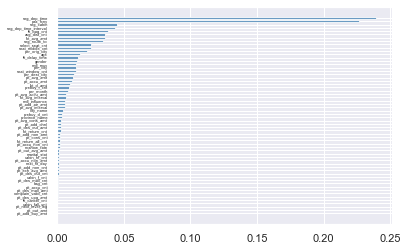

In [72]:
plt.barh(np.arange(60)+0.6, importances[:], height=.7,color='steelblue', alpha=0.8,tick_label=feat)
# 从下往上画
plt.yticks(fontsize=4)
plt.savefig('bar.png',dpi=300)
plt.show()

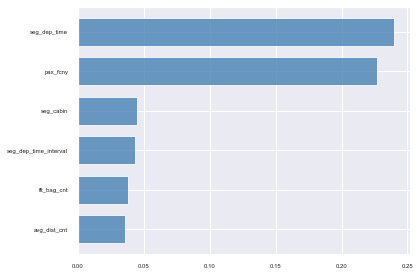

In [71]:
plt.barh(np.arange(6), importances[54:], height=.7,color='steelblue', alpha=0.8,tick_label=feat[54:])
# 从下往上画
plt.yticks(rotation=0,fontsize=6)
plt.xticks(rotation=0,fontsize=6)
plt.tight_layout()
plt.savefig('bar.png',dpi=500)
plt.show()

In [10]:
train_x,test_x,train_y,test_y = train_test_split(x[imp_fea[:6]],y,test_size=0.3,random_state=0,stratify=y)

In [12]:
model =  RandomForestClassifier()
model.fit(train_x,train_y)
y_pred = model.predict(test_x) 
accuracy_score(test_y, y_pred)

0.9869187145557656

In [21]:
joblib.dump(model,'a04.model')

['a04.model']

[[6414  173]
 [   0 6638]]


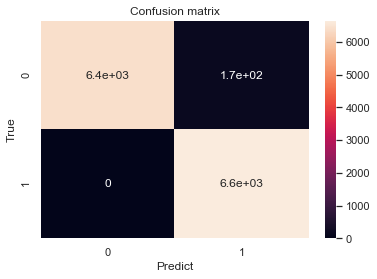

In [13]:
sns.set()
f,ax=plt.subplots()
C2= confusion_matrix(test_y, y_pred, labels=[0, 1])
print(C2) #打印出来看看
sns.heatmap(C2,annot=True,ax=ax) #画热力图
ax.set_title('Confusion matrix') #标题
ax.set_xlabel('Predict') #x轴
ax.set_ylabel('True') #y轴
plt.savefig('matrix.png',dpi=300)

In [164]:
#绘制曲线图
acc=[]
for i in np.arange(10)+1:
    train_x,test_x,train_y,test_y = train_test_split(x[imp_fea[:i]],y,test_size=0.3,random_state=0,stratify=y)
    model =  RandomForestClassifier()
    model.fit(train_x,train_y)
    y_pred = model.predict(test_x) # 对新的样本Z做预测 
    acc.append(accuracy_score(test_y, y_pred))
plt.plot(np.arange(1,11,1),acc)
plt.xticks(np.arange(1,11,1))
plt.savefig('line.png',dpi=300)

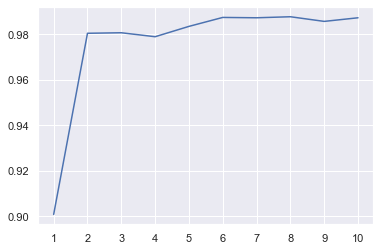

In [185]:
plt.plot(np.arange(1,11,1),acc)
plt.xticks(np.arange(1,11,1))
plt.savefig('line.png',dpi=300)